# Learning from Data to Predict

### Key themes
* The prediction task 
* Supervised learning 
* Machine learning tasks — e.g., regression (continuous) and classification (binary) 
* Building and evaluation of simple prediction models 
* The problem of model overfitting and strategies to avoid it:
  * Splitting the data into training set and testing set
  * Cross-validation
* Introduction to supervised machine learning algorithms, including _k_-Nearest Neighbors and Logistic Regression

### Learning resources
<i class="fas fa-play-circle"></i> [Predictability of life trajectories](https://www.youtube.com/watch?v=sOaPTrhB_uU) by Matthew Salganik

<i class="fas fa-play-circle"></i> [Introduction to Machine Learning Methods](https://youtu.be/pH-WuMW2rRE?t=1) by Susan Athey

<i class="fas fa-play-circle"></i> [Machine Learning with Scikit Learn](https://www.youtube.com/watch?v=HC0J_SPm9co) by Jake VanderPlas

<i class="fas fa-scroll"></i> M Molina & F Garip. 2019. [Machine learning for sociology.](https://osf.io/preprints/socarxiv/a6r9g/) _Annual Review of Sociology._ [Link](https://osf.io/preprints/socarxiv/a6r9g/) to an open-access version of the article available at the Open Science Framework.

<i class="fas fa-book"></i> Ian Foster, Rayid Ghani, Ron S. Jarmin, Frauke Kreuter, Julia Lane. 2021. [Chapter 7: Machine Learning](https://textbook.coleridgeinitiative.org/chap-ml.html). In _Big Data and Social Science_ (2nd edition).

<i class="fas fa-book"></i> Aurélien Géron. 2019. [Chapter 2: End-to-end Machine Learning project](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb). In _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow_ (2nd Edition). O’Reilly.<br>




# The Prediction task

[Prediction](https://www.tandfonline.com/doi/full/10.1080/09332480.2019.1579578) is a data science task among other data science tasks, including description and causal inference. [Prediction](https://osf.io/preprints/socarxiv/a6r9g/) is the use of data to map some input _(X)_ to  an  output  _(Y)_. The prediction task is called _classification_ when the output variable is categorical (or discrete), and _regression_ when it is continuous. Our focus in this session will be on classification.

# Prediction tasks in social sciences

There are many [prediction problems in social sciences (summarised in Kleinberg et al. 2015)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4869349/) that can benefit from (supervised) machine learning, for example: 
* In child protection, predicting [when kids are in danger](https://www.nytimes.com/2018/01/02/magazine/can-an-algorithm-tell-when-kids-are-in-danger.html); 
* In the criminal justice system, predicting whether to detain or release arrestees as they await adjudication of their case (e.g., Kleinberg et al. 2015); 
* In population health, [predicting suicides](https://balkin.blogspot.com/2018/10/artificial-intelligence-for-suicide.html); 
* In education, predicting which teacher will have the greatest value add (e.g., Rockoff et al., 2011); 
* In higher education, predicting earlier [university dropouts](https://www.degruyter.com/document/doi/10.1515/jbnst-2019-0006/html);
* In labor market policy, predicting unemployment spell length to help workers decide on savings rates and job search strategies;
* In social policy, predicting highest risk youth for targeting interventions (e.g., Chandler et al., 2011);
* In sociology, predicting [life outcomes (Salganik et al. 2020)](https://www.pnas.org/content/117/15/8398).
<br>

# Predictions gone wrong
Prediction and machine learning models went wrong in a few occasions in different domains, including public health, education, the criminal justice system, and healthcare:
* David Lazer et all. [The Parable of Google Flu: Traps in Big Data Analysis.](https://science.sciencemag.org/content/343/6176/1203) Science.  
* [What went wrong with the A-level algorithm?](https://www.youtube.com/watch?v=jHtMLEhDOVE) Financial Times.
* [Why did the A-level algorithm say no?](https://www.bbc.co.uk/news/education-53787203) BBC.
* [Blame the politicians, not the technology, for A-level fiasco.](https://www.ft.com/content/58dcbfaa-740f-4747-8240-bc5ffb412e67). 
Financial Times.
* [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing). ProPublica.
* Ziad Obermeyer at all. [Dissecting racial bias in an algorithm used to manage the health of populations](https://science.sciencemag.org/content/366/6464/447). Science.

Regardless of whether you use or not machine learning in your research, knowledge about prediction and machine learning techniques can help you evaluate how those techniques are used across domains and possibly identify ethical challenges and potential biases in those applications. Importantly, such data ethics challenges are found to reside not only in the machine learning algorithms themselves but in the entire [data science 'pipeline' or ecosystem](https://textbook.coleridgeinitiative.org/chap-bias.html).

# Supervised learning 

Learn a model from labeled training data or outcome variable that would enable us to make predictions about unseen or future data. The learning is called supervised because the labels (e.g., email Spam or Ham where 'Ham' is e-mail that is not Spam) of the outcome variable _(Y)_ that guide the learning process are already known. 

# Research problem: vaccine hesitancy 

We will aim to predict people who are unlikely to take a coronavirus vaccine _(Y)_ from socio-demographic and health input features _(X)_. An unbiased prediction of individuals who are unlikely to vaccinate can inform targeted public health interventions, including information campaigns disseminating evidence-based information about Covid-19 vaccines.

# Data: Understanding Society COVID-19

We will use data from [The Understanding Society: Covid-19 Study](https://www.understandingsociety.ac.uk/topic/covid-19). The survey asks participants across the UK about their experiences during the COVID-19 outbreak. We will use Wave 6 (November 2020) of the survey. 

The data are safeguarded and can be downloaded from the [UK Data Service](https://beta.ukdataservice.ac.uk/datacatalogue/studies/study?id=8644).

<img src="https://www.cdcs.ed.ac.uk/files/styles/large_16x9/public/2019-08/Spotlighton_AjaMurray_A4_UKHLS_Logo_positive_RGB_300dpi.jpg?itok=YmQnr_oq" width="600" height="300" >

## Accessing data from your Google Drive
After you obtain access to the Understanding Society: Covid-19 Study, 2020, you can upload the Wave 6 (November 2020) data set into your Google Drive. Then you will need to connect your Google Drive to your Google Colab using the code below:   

In [1]:
# Import the Drive helper
from google.colab import drive

# This will prompt for authorization. Enter your authorisation code and rerun the cell. 
drive.mount('/content/drive')

## Loading the Understanding Society Covid-19 Study (Wave 6, November 2020)

In [86]:
import pandas as pd
import numpy as np

USocietyCovid = pd.read_csv('/content/drive/My Drive/Understanding_Society_Covid19_Wave6_November2020.csv')

In [89]:
# Display all columns in the Understanding Society: COVID-19 Study 
pd.options.display.max_columns = None

USocietyCovid.head(0) # display headings only as the data is safeguarded

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,i_hidp,j_hidp,k_hidp,i_ioutcome,j_ioutcome,k_ioutcome,cf_welsh,cf_dobchk,cf_age,cf_sex_cv,cf_addrchk,cf_couplewsh,cf_hhnum,cf_personsexa,cf_personsexb,cf_personsexc,cf_personsexd,cf_personsexe,cf_personsexf,cf_personsexg,cf_personsexh,cf_personsexi,cf_personsexj,cf_personsexk,cf_personagea,cf_personageb,cf_personagec,cf_personaged,cf_personagee,cf_personagef,cf_personageg,cf_personageh,cf_personagei,cf_personagej,cf_personagek,cf_relationa,cf_relationb,cf_relationc,cf_relationd,cf_relatione,cf_relationf,cf_relationg,cf_relationh,cf_relationi,cf_relationj,cf_relationk,cf_couple,cf_hhcompa,cf_hhcompb,cf_hhcompc,cf_hhcompd,cf_hhcompe,cf_parent0plus,cf_parent5plus,cf_parent015,cf_parent1619,cf_parent511,cf_parent1217,cf_parent418,cf_scsf1,cf_ff_hadsymp,cf_clinvuln_dv,cf_hadsymp,cf_hassymp,cf_symptoms1,cf_symptoms2,cf_symptoms23,cf_symptoms24,cf_symptoms25,cf_symptoms3,cf_symptoms4,cf_symptoms5,cf_symptoms6,cf_symptoms7,cf_symptoms8,cf_symptoms9,cf_symptoms10,cf_symptoms12,cf_symptoms13,cf_symptoms14,cf_symptoms15,cf_symptoms16,cf_symptoms17,cf_symptoms18,cf_symptoms19,cf_symptoms20,cf_symptoms21,cf_symptoms22,cf_symptoms11,cf_cv19treat,cf_cv19trwhat1,cf_cv19trwhat2,cf_cv19trwhat3,cf_cv19trwhat4,cf_cv19trwhat5,cf_cv19trwhat6,cf_cv19trwhat7,cf_cv19trwhat8,cf_cv19trwhat9,cf_cv19trwhat10,cf_cv19trwhat11,cf_longcovid,cf_lgcvsymp1,cf_lgcvsymp23,cf_lgcvsymp24,cf_lgcvsymp25,cf_lgcvsymp3,cf_lgcvsymp4,cf_lgcvsymp5,cf_lgcvsymp6,cf_lgcvsymp7,cf_lgcvsymp8,cf_lgcvsymp9,cf_lgcvsymp10,cf_lgcvsymp12,cf_lgcvsymp13,cf_lgcvsymp14,cf_lgcvsymp15,cf_lgcvsymp16,cf_lgcvsymp17,cf_lgcvsymp18,cf_lgcvsymp19,cf_lgcvsymp20,cf_lgcvsymp21,cf_lgcvsymp22,cf_lgcvsymp26,cf_lgcvsymp_oth,cf_tested,cf_testresult,cf_testwhen_d,cf_testwhen_m,cf_testwhen_y,cf_hadcovid,cf_testtrace,cf_traceinfo,cf_traceinfoeng,cf_traced,cf_contactcv19t1,cf_contactcv19t5,cf_contactcv19t2,cf_contactcv19t3,cf_contactcv19t4,cf_riskcv19,cf_smartphone,cf_smarttype,cf_smartmodel,cf_covidapp,cf_whynotapp1,cf_whynotapp2,cf_whynotapp3,cf_whynotapp4,cf_whynotapp5,cf_whynotapp6,cf_whynotapp7,cf_whynotapp8,cf_whynotapp9,cf_whynotapp10,cf_whynotapp11,cf_whynotapp_oth,cf_whynotapporder,cf_covidappon,cf_covidappnot1,cf_covidappnot2,cf_covidappnot3,cf_covidappnot_oth,cf_hhsymp,cf_hhsympwho_persona,cf_hhsympwho_personb,cf_hhsympwho_personc,cf_hhsympwho_persond,cf_hhsympwho_persone,cf_hhsympwho_personf,cf_hhsympwho_persong,cf_hhsympwho_personh,cf_hhsympwho_personi,cf_hhsympwho_personj,cf_hhsympwho_personk,cf_hhsympwho_personl,cf_hhsympwho_personm,cf_hhsympwho_personn,cf_hhsympwho_persono,cf_hhsympwho_personp,cf_hhsympwho_personq,cf_hhsympwho_personr,cf_hhsympwho_persons,cf_hhsympwho_persont,cf_hhsympwho_personu,cf_hhsympwho_personv,cf_hhsympwho_personw,cf_hhsympwho_personx,cf_hhsympwho_persony,cf_hhsympwho_none,cf_hhtest,cf_hhtestwho_persona,cf_hhtestwho_personb,cf_hhtestwho_personc,cf_hhtestwho_persond,cf_hhtestwho_persone,cf_hhtestwho_personf,cf_hhtestwho_persong,cf_hhtestwho_personh,cf_hhtestwho_personi,cf_hhtestwho_personj,cf_hhtestwho_personk,cf_hhtestwho_personl,cf_hhtestwho_personm,cf_hhtestwho_personn,cf_hhtestwho_persono,cf_hhtestwho_personp,cf_hhtestwho_personq,cf_hhtestwho_personr,cf_hhtestwho_persons,cf_hhtestwho_persont,cf_hhtestwho_personu,cf_hhtestwho_personv,cf_hhtestwho_personw,cf_hhtestwho_personx,cf_hhtestwho_persony,cf_hhtestwho_none,cf_hhresult_persona,cf_hhresult_personb,cf_hhresult_personc,cf_hhresult_persond,cf_hhresult_persone,cf_hhresult_personf,cf_hhresult_persong,cf_hhresult_personh,cf_hhresult_personi,cf_hhresult_personj,cf_hhresult_personk,cf_hhresult_personl,cf_hhresult_personm,cf_hhresult_personn,cf_hhresult_persono,cf_hhresult_personp,cf_hhresult_personq,cf_hhresult_personr,cf_hhresult_persons,cf_hhresult_persont,cf_hhresult_personu,cf_hhresult_personv,cf_hhresult_personw,cf_hhresult_personx,cf_hhresult_persony,cf_hhtestwhen_d_persona,cf_hhtestwhen_m_persona,cf_hhtestwhen_y_persona,cf_hhtestwhen_d_personb,cf_hhtestwhen_m_personb,cf_hh

In [4]:
USocietyCovid.shape

(12035, 916)

In [5]:
USocietyCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12035 entries, 0 to 12034
Columns: 916 entries, pidp to cf_betaindin_lw_t2
dtypes: float64(10), int64(855), object(51)
memory usage: 84.1+ MB


# Defining Output and Input variables

Here are the Output and Input data features we will use in this session.

#### Outcome: Output _(Y)_

|Description| Variable| Values
| ---| ---|---|
|Likelihood of taking up a coronavirus vaccination | cf_vaxxer | 1 = Very likely, 2 = Likely, 3 = Unlikely, 4 = Very unlikely

#### Predictors: Input features _(X)_

We select 4 (demographic and health-related) variables as examples only, no prior literature or expert knowledge is considered. We will discuss the role of prior literature and expert knowledge in the process of variable selection when we learn causal inference approaches. 

|Description| Variable| Values
| ---| ---|---|
|Age | cf_age | Integer values (whole numbers)
| Respondent sex | cf_sex_cv | 1 = Male, 2 = Female, 3 = Prefer not to say
| General health | cf_scsf1 | 1 = Excellent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor 
| At risk of serious illness from Covid-19 | cf_clinvuln_dv | 0 = no risk (not clinically vulnerable), 1 = moderate risk (clinically vulnerable), 2 = high risk (clinically extremely vulnerable)

# Data wrangling

In [6]:
# Select output y and input X variables
USocietyCovid = USocietyCovid[['cf_vaxxer', 'cf_age','cf_sex_cv','cf_scsf1', 'cf_clinvuln_dv']]
USocietyCovid.head()

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
0,2,37,2,2,0
1,3,35,1,4,0
2,3,55,2,2,0
3,1,38,1,3,1
4,1,67,2,2,0


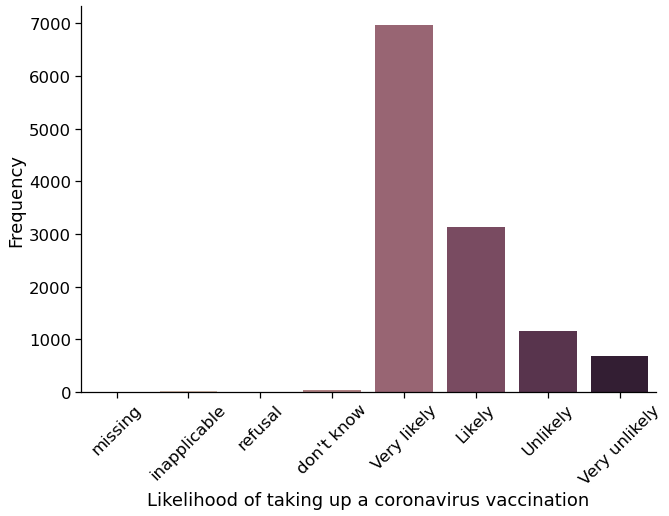

In [7]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

fig = sns.catplot(x="cf_vaxxer", 
            kind = "count",
            height=6, aspect=1.5, palette="ch:.25",
            data = USocietyCovid)

# Tweak the plot 
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["missing", "inapplicable", "refusal", "don't know", "Very likely","Likely","Unlikely","Very unlikely"])
    .set_xticklabels(rotation=45))

Missing observations in Understanding Society are indicated by negative values. Let's convert negative values to NaN using the function `mask` in `pandas`. An alternative approach would be to reload the data using the Pandas `read_csv()` function and provide the negative values as an argument to the parameter `na_values`, as a result of which Pandas will recognise these values as NaN.  

In [8]:
# The function 'mask' in pandas replaces values where a condition is met.
USocietyCovid = USocietyCovid.mask(USocietyCovid < 0)
# Alternatively, you could replace negative values with another value, e.g., 0, using the code USocietyCovid.mask(USocietyCovid < 0, 0)
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
0,2.0,37,2,2.0,0.0
1,3.0,35,1,4.0,0.0
2,3.0,55,2,2.0,0.0
3,1.0,38,1,3.0,1.0
4,1.0,67,2,2.0,0.0
...,...,...,...,...,...
12030,1.0,57,1,2.0,0.0
12031,2.0,70,2,3.0,1.0
12032,2.0,64,1,2.0,0.0
12033,4.0,31,1,1.0,0.0


In [9]:
# Remove NaN
USocietyCovid = USocietyCovid[['cf_vaxxer', 'cf_age', 'cf_sex_cv', 'cf_scsf1', 'cf_clinvuln_dv']].dropna()

USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
0,2.0,37,2,2.0,0.0
1,3.0,35,1,4.0,0.0
2,3.0,55,2,2.0,0.0
3,1.0,38,1,3.0,1.0
4,1.0,67,2,2.0,0.0
...,...,...,...,...,...
12030,1.0,57,1,2.0,0.0
12031,2.0,70,2,3.0,1.0
12032,2.0,64,1,2.0,0.0
12033,4.0,31,1,1.0,0.0


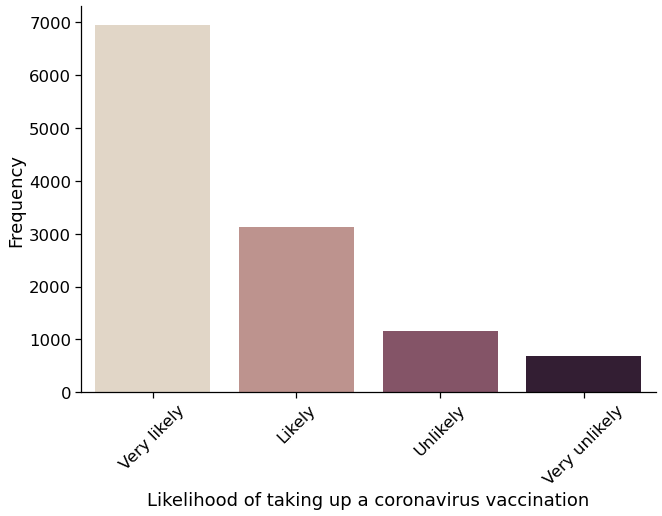

In [10]:
# Plot the new cf_vaxxer (vaccination likelihood) variable

fig = sns.catplot(x="cf_vaxxer",
            kind = "count",
            height=6, aspect=1.5, palette="ch:.25",
            data = USocietyCovid)

# Tweak the plot
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["Very likely","Likely","Unlikely","Very unlikely"])
    .set_xticklabels(rotation=45))

To simplify the problem, we will recode `cf_vaxxer` (vaccination likelihood) variable into a binary variable where 1 refers to 'Likely to take up a Covid-19 vaccine' and 2 refers to 'Unlikely to take up a Covid-19 vaccine'. To achieve this, we use the `replace()` method which replaces a set of values we specify (in our case, `[1,2,3,4]`) with another set of values we specify (in our case, `[1,1,0,0]`).     

In [43]:
# Recode cf_vaxxer into a binary variable
USocietyCovid['cf_vaxxer'] = USocietyCovid['cf_vaxxer'].replace([1,2,3,4],[1,1,0,0])
USocietyCovid.head()

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
0,1.0,37,2,2.0,0.0
1,0.0,35,1,4.0,0.0
2,0.0,55,2,2.0,0.0
3,1.0,38,1,3.0,1.0
4,1.0,67,2,2.0,0.0


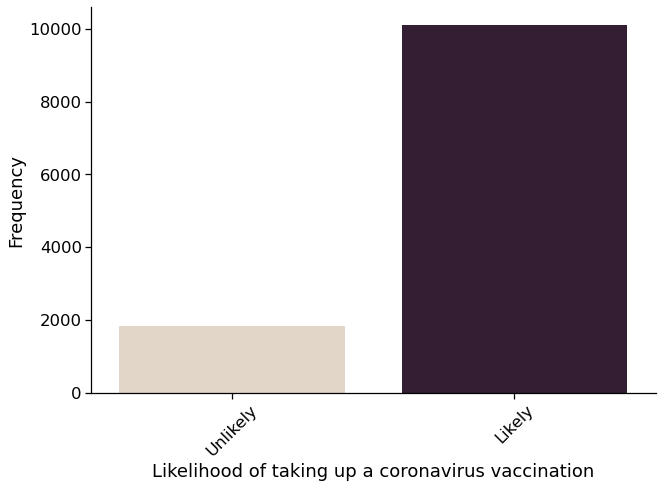

In [12]:
# Plot the binary cf_vaxxer (vaccination likelihood) variable
fig = sns.catplot(x="cf_vaxxer", 
            kind = "count",
            height=6, aspect=1.5, palette="ch:.25",
            data = USocietyCovid)

# Tweak the plot 
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["Unlikely","Likely"])
    .set_xticklabels(rotation=45))

In [13]:
USocietyCovid.groupby('cf_vaxxer').count()

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
cf_vaxxer,,,,
0.0,1837,1837,1837,1837
1.0,10093,10093,10093,10093


In [14]:
USocietyCovid.shape[0]

11930

In [15]:
# 84.6% of respondents very likely or likely to take up a Covid vaccine and 15.4% very unlikely or unlikely  
USocietyCovid.groupby('cf_vaxxer').count()/USocietyCovid.shape[0]

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv
cf_vaxxer,,,,
0.0,0.153982,0.153982,0.153982,0.153982
1.0,0.846018,0.846018,0.846018,0.846018


So far, we have described our outcome variable to make sense of the task but we have neither looked at the predictor variables nor examined any relationships between predictor variables and outcomes. It is a good practice to first split the data into training set and test set and only then explore predictors and relationships in the training set.

# Overfitting and data splitting

#### The problem of model overfitting
Overfitting occurs when model captures 'noise' in a specific sample while failing to recognise general patterns across samples. As a result of overfitting, the model produces accurate predictions for examples from the sample at hand but will predict poorly new examples the model has never seen.

#### Training set, Validation set, and Test set
To avoid overfitting, data is typically split into three groups: 
* Training set — used to train models 
* Validation set — used to tune the model and estimate  model performance/accuracy for best model selection
* Test set - used to evaluate the generalisability of the model to new observations the model has never seen

If your data set is not large enough, a possible strategy, which we will use here, is to split the data into training set and test set, and use cross-validation on the training set to evaluate our models' performance/accuracy. We will use 2/3 of the data to train the predictive model and the remaining 1/3 to create the test set.   

In [16]:
# Split train and test data

from sklearn.model_selection import train_test_split

# Outcome variable
y = USocietyCovid[['cf_vaxxer']]

# Predictor variables
X = USocietyCovid[['cf_age', 'cf_sex_cv', 'cf_scsf1', 'cf_clinvuln_dv']]

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [17]:
print('Train data', X_train.shape, '\n''Test data', X_test.shape)

Train data (7993, 4) 
Test data (3937, 4)


# Preprocessing the training data set

## Categorical predictors — dummy variables

Categorical variables are often encoded using numeric values. For example, Respondent sex is recorded as 1 = Men, 2 = Female, 3 = Prefer not to say. The numeric values can be 'misinterpreted' by the algorithms — the value of 1 is obviously less than the value of 3 but that does not correspond to real-world numerical differences. 

A solution is to convert categorical predictors into dummy variables. Basically, each category value is converted into a new column and assigns a 1 or 0 (True/False) values using the function `get_dummies` in `pandas`. The function creates dummy/indicator variables that contain value of 1 or 0. 

The Respondent sex variable is converted below is three columns of 1s or 0s corresponding to the respective value.

In [18]:
# Use get_dummies to convert the Respondent sex categorical variable into 3 dummy/indicator variables
X_train_predictors = pd.get_dummies(X_train, columns=["cf_sex_cv"])
X_train_predictors.head()

,cf_age,cf_scsf1,cf_clinvuln_dv,cf_sex_cv_1,cf_sex_cv_2,cf_sex_cv_3
994,28,2.0,0.0,0,1,0
11376,41,5.0,0.0,0,1,0
9730,77,3.0,1.0,0,1,0
8235,41,3.0,2.0,0,1,0
1406,60,2.0,0.0,0,1,0


In [44]:
# Create two DataFrames, one for numerical variables and one for categorical variables
X_train_predictors_cat = X_train_predictors[['cf_sex_cv_1', 'cf_sex_cv_2', 'cf_sex_cv_3']]
X_train_predictors_cont = X_train_predictors[['cf_age', 'cf_scsf1', 'cf_clinvuln_dv']]

## Continuous predictors — standardisation
We standardise the continuous input variables.

In [91]:
# Standardise the predictors using the StandardScaler function in sklearn
from sklearn.preprocessing import StandardScaler  # For standartising data
scaler = StandardScaler() # Initialising the scaler using the default arguments 
X_train_predictors_cont_scale = scaler.fit_transform(X_train_predictors_cont) # Fit to continuous input variables and return the standardised dataset 
X_train_predictors_cont_scale

array([[-1.65608796, -0.56081614, -0.80754698],
       [-0.84497135,  2.64868513, -0.80754698],
       [ 1.40119771,  0.50901761,  0.81873748],
       ...,
       [-0.96975852, -1.6306499 , -0.80754698],
       [ 0.46529394,  0.50901761,  2.44502193],
       [ 0.77726186,  0.50901761,  0.81873748]])

#### Combine categorical and continuous predictors into one data array

In [21]:
# Use the concatenate function in Numpy to combine all variables — both categorical and continuous predictors — in one array
X_train_preprocessed = np.concatenate([X_train_predictors_cont_scale,X_train_predictors_cat], axis = 1)
X_train_preprocessed

array([[-1.65608796, -0.56081614, -0.80754698,  0.        ,  1.        ,
         0.        ],
       [-0.84497135,  2.64868513, -0.80754698,  0.        ,  1.        ,
         0.        ],
       [ 1.40119771,  0.50901761,  0.81873748,  0.        ,  1.        ,
         0.        ],
       ...,
       [-0.96975852, -1.6306499 , -0.80754698,  0.        ,  1.        ,
         0.        ],
       [ 0.46529394,  0.50901761,  2.44502193,  0.        ,  1.        ,
         0.        ],
       [ 0.77726186,  0.50901761,  0.81873748,  1.        ,  0.        ,
         0.        ]])

In [22]:
X_train_preprocessed.shape

(7993, 6)

# Unbalance class problem

In the case of the vaccination likelihood question, one of the classes (likely to vaccinate) has a significantly greater proportion of cases (84.6%) than the other case (unlikely to vaccinate) (15.4%). We therefore face an unbalanced class problem. 

Different methods to mitigate the problem exist. We will use a method called ADASYN: Adaptive Synthetic Sampling Method for Imbalanced Data. The method oversamples the minority class in the training data set until both classes have an equal number of observations. Hence, the data set we use to train our models contains two balanced classes.

In [23]:
from imblearn.over_sampling import ADASYN

# Initialization of the ADASYN resampling method; set random_state for reproducibility
adasyn = ADASYN(random_state=0)

# Fit the ADASYN resampling method to the train data  
X_train_balance, y_train_balance = adasyn.fit_resample(X_train_preprocessed, y_train)

The resulting `X_train_balance` and `y_train_balance` now include both the original data and the resampled data. The `y_train_balance` now includes an almost equal number of labels for each class.

In [24]:
# Now that the two classes are balanced, the train data is ~14K observations, greater than the original ~8K.   
X_train_balance.shape

(13611, 6)

### Hands-on mini-exercise

Verify that after the oversampling the `y_train_balance` data object contains indeed approximately equal number of observations for both classes, those likely to vaccinate (1) and those unlikely to vaccinate (0). 

Note that `y_train_balance` is a NumPy array. You can check that on your own using the function `type()`, for example: type(y_train).

In [25]:
(y_train_balance == 0).sum()

cf_vaxxer    6849
dtype: int64

In [26]:
(y_train_balance == 1).sum()

cf_vaxxer    6762
dtype: int64

# Train models on training data

We fit two classifiers — k-Nearest Neighbours (k-NN) and Logistic Regression — on the training data. The k-Nearest Neighbours classifier (k-NN) and Logistic Regression classifier are two widely used classifiers. Our focus is on the end-to-end workflow so we do not discuss the workings of the two classifiers in detail. To learn more about the two classifiers, see [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) by Jake VanderPlas (on k-NN) and the DataCamp course [Supervised Learning with scikit-learn](https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn). 

In the models below, we use the default hyperparameters (hyperparameter are parameters that are not learned from data but are set by the researcher to guide the learning process) for both classifiers.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Create an instance of k-nearest neighbors (k-NN) classifier.
# We set the hyperparameter n_neighbors=5 meaning that the label of an unknown respondent (0 or 1) is a function of the labels of its five closest training respondents.
kNN_Classifier =  KNeighborsClassifier(n_neighbors = 5)

# Create an instance of Logistic Regression Classifier
LogReg_Classifier =  LogisticRegression()

# Fit both models to the training data
kNN_Classifier.fit(X_train_balance, y_train_balance.cf_vaxxer)
LogReg_Classifier.fit(X_train_balance, y_train_balance.cf_vaxxer)

LogisticRegression()

# Model evaluation using Cross-validation

Now that your two models are fitted, you can evaluate the accuracy of their prediction. In older approaches, the prediction accuracy is often calculated on the same set of training data used to fit the model. The problem of such an approach is that the model can 'memorise' the training data and show high prediction accuracy on that data set while failing to perform well on new data. For this reason, approaches in data science, and machine learning in particular, prefer to evaluate the prediction accuracy of a model on new data that has not been used in training the model.

## The cross-validation technique

Cross-Validation is a methodology to assess accuracy of model prediction without relying on in-sample prediction. We will split our training set into _k_ equal folds or parts. The number of folds can differ but for simplicity we will consider 5-fold cross-validation. How does 5-fold cross-validation work? While keeping aside one fold (or part), we fit the model with the remaining four folds and use the fitted model to predict outcomes of observations in fold one and on this basis compute model prediction accuracy. We repeat the procedure for all 5 folds or parts of the data and compute the average prediction accuracy.

## Metrics to evaluate model performance
Many [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) to evaluate model performance exist. We evaluate model performance using the accuracy score. The accuracy score is the simplest metric for evaluating classification models. Simply put, accuracy is the proportion of predictions our model got right. Keep in mind, however, that because of the unbalanced class problem, accuracy may not be the best metric in our case. Because one of our classes accounts for 84.6% of the cases, even a model that uniformly predicts that all respondents are likely to take up the vaccine will obtain very high accuracy of 0.846 while being useless for identifying respondents who are unlikely to take up the vaccine. We will return to this problem shortly.

In [68]:
# Import the function cross_val_score() which performs cross-validation and evaluates the model using a score
# Many scores are available to evaluate a classification mdoel, we select the simplest one called accuracy
from sklearn.model_selection import cross_val_score

# Evaluate the kNN_Classifier model via 5-fold cross-validation
kNN_score = cross_val_score(kNN_Classifier, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy')
kNN_score

array([0.6232097 , 0.65686995, 0.64070536, 0.65980896, 0.64731815])

In [69]:
# Take the mean across the five accuracy scores
kNN_score.mean()*100

64.55824239753719

In [70]:
# Repeat for our logistic regression model
LogReg_score = cross_val_score(LogReg_Classifier, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy')
LogReg_score.mean()*100

62.21431553077533

The output from the cross-validation technique shows that the performance of our two models is comparable as measured by the accuracy score. 

At this stage, we could fine-tune model hyperparameters — i.e., parameters that the model does not learn from data, e.g., the number of _k_ neighbours in the _k_-NN algorithm — and re-evaluate model performance. During the process of model validation, we do not use the test data. Once we are happy with how our model(s) perform, we test the model on unseen data.  

# Testing model accuracy on new data

Before we test the accuracy of our model on the test data set, we preprocess the test data set using the same procedure we used to preprocess the training data.

# Preprocessing the test data set

In [71]:
# Use get_dummies to convert the Respondent sex categorical variable into 3 dummy/indicator variables
X_test_predictors = pd.get_dummies(X_test, columns=["cf_sex_cv"])

# Create two DataFrames, one for quantitative variables and one for qualitative variables
X_test_predictors_cat = X_test_predictors[['cf_sex_cv_1', 'cf_sex_cv_2', 'cf_sex_cv_3']]
X_test_predictors_cont = X_test_predictors[['cf_age', 'cf_scsf1', 'cf_clinvuln_dv']]

# Standardise the predictors using the StandardScaler function in sklearn
scaler = StandardScaler() # Initialising the scaler using the default arguments 
X_test_predictors_cont_scale = scaler.fit_transform(X_test_predictors_cont) # Fit to continuous input variables and return the standardised dataset 

# Use the concatenate function in Numpy to combine all variables — both categorical and continuous predictors — in one array
X_test_preprocessed = np.concatenate([X_test_predictors_cont_scale,X_test_predictors_cat], axis = 1)
X_test_preprocessed

array([[ 0.44686144, -1.63480238, -0.82552056,  1.        ,  0.        ,
         0.        ],
       [-0.41738323, -0.58244513, -0.82552056,  0.        ,  1.        ,
         0.        ],
       [-0.35565147, -0.58244513, -0.82552056,  1.        ,  0.        ,
         0.        ],
       ...,
       [ 0.01473911, -0.58244513, -0.82552056,  1.        ,  0.        ,
         0.        ],
       [ 1.37283788,  0.46991213,  0.7914319 ,  0.        ,  1.        ,
         0.        ],
       [-0.47911499, -1.63480238, -0.82552056,  1.        ,  0.        ,
         0.        ]])

# Predicting vaccine hesitancy

Use the `predict` function to predict who is likely to take up the COVID-19 vaccine or not using the test data.

In [72]:
y_pred_kNN = kNN_Classifier.predict(X_test_preprocessed)
y_pred_LogReg = LogReg_Classifier.predict(X_test_preprocessed)

In [73]:
y_pred_LogReg

array([1., 0., 1., ..., 1., 1., 1.])

# Model evaluation on test data

Let's evaluate the performance of our models predicting vaccination willingness using accuracy metric.

In [74]:
# Evaluate performance using the accuracy score for the logistic regresson model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_LogReg)

0.6245872491744984

In [75]:
# Evaluate performance using the accuracy score for the  k-nearest neighbors model
accuracy_score(y_test, y_pred_kNN)

0.5044450088900178

The accuracy scores are slightly lower on the test set compared to the accuracy score on the training set, indicating that the data split methodology mitigates the risk of overfitting. 

Accuracy is a good metric when the positive class and the negative class are balanced. However, when one of the classes is a majority, as in our case, then a model can achieve a high accuracy by just predicting all observations to be the majority class. However, this is not what we want. In fact, in order to inform an information campaign about vaccination, we are more interested in predicting the minority class, people that are unlikely to take up the vaccine. 

We can use a confusion matrix to further evaluate the performance of our classification models. The confusion matrix shows the number of respondents known to be in group 0 (unlikely to vaccinate) or 1 (likely to vaccinate) and predicted to be in group 0 or 1, respectively.  

The confusion matrix below shows that the logistic model predicts 393 out of the 606 respondents who are unlikely to vaccinate. The model does much better job predicting respondents that are likely to vaccinate, 2066 out of 3331 respondents in the test data set.

In [76]:
# Confusion matrix for the logistic regression model plotted via Pandas crosstab() function

pd.crosstab(y_test.cf_vaxxer,y_pred_LogReg, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,393,213,606
1.0,1265,2066,3331
All,1658,2279,3937


What do the numbers in the confusion matrix mean?
* True positive - our model correctly predicts the positive class (likely to vaccinate)
* True negative - our model correctly predicts the negative class (unlikely to vaccinate)
* False positive - our model incorrectly predicts the positive class
* False negative - our model incorrectly predicts the negative class

In [77]:
# Here is another representation of the confusion matrix using the scikit-learn `confusion_matrix` function
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_LogReg)

array([[ 393,  213],
       [1265, 2066]])

In [78]:
# The function ravel() flattens the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_LogReg).ravel()
print('True negative = ', tn, '\nFalse positive = ', fp, '\nFalse negative = ', fn, '\nTrue positive = ', tp)

True negative =  393 
False positive =  213 
False negative =  1265 
True positive =  2066


For the k-nearest neighbors model, the confusion matrix  below shows that the k-NN model predicts 316 out of the 606 respondents who are unlikely to vaccinate (the logistic regression model predicts more accurately those unlikely to vaccinate). The model does not predicts well respondents that are likely to vaccinate, 1670 out of 3331 respondents in the test data set. 

Recall that we are less interested in predicting the majority class (likely to vaccinate). Instead, we are interested in predicting the minority class (unlikely to vaccinate) so that the results can inform an information campaign among people that are unlikely to vaccinate.

In [79]:
# Confusion matrix for the k-nearest neighbors model plotted via pandas function crosstab
pd.crosstab(y_test.cf_vaxxer,y_pred_kNN, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,316,290,606
1.0,1661,1670,3331
All,1977,1960,3937


Instead of relying on a single metric, it is often helpful (if not confusing) to compare various metrics. You can use the scikit-learn function [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate various classification metrics, including [precision and recall](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report). 

In [83]:
from sklearn.metrics import classification_report

# Various metrics for the logistic regression model
print(classification_report(y_test,y_pred_LogReg))

              precision    recall  f1-score   support

         0.0       0.24      0.65      0.35       606
         1.0       0.91      0.62      0.74      3331

    accuracy                           0.62      3937
   macro avg       0.57      0.63      0.54      3937
weighted avg       0.80      0.62      0.68      3937



In [84]:
# Various metrics for the k-nearest neighbors model 
print(classification_report(y_test,y_pred_kNN))

              precision    recall  f1-score   support

         0.0       0.16      0.52      0.24       606
         1.0       0.85      0.50      0.63      3331

    accuracy                           0.50      3937
   macro avg       0.51      0.51      0.44      3937
weighted avg       0.75      0.50      0.57      3937



Overall, predicting accuracy of approximately 62% and 50% for the two models and the low predictive accuracy of the minority class (unlikely to vaccinate) indicate that the performance of our models is far from optimal. However, the purpose of this lab is not to build a well-performing model but to introduce you to an end-to-end machine learning workflow. 

Keep in mind that it is not a good research practice to now — after you tested the models on the test data — go back and fine-tune the training models as this will introduce overfitting. A good research practice is to fine-tune and improve your model(s) at the stage of training and cross-validation (not after you tested your model on unseen data). Once you select your best performing model(s) at the cross-validation stage, you test the model using the test data and report the performance scores.

As part of your data analysis exercises, you will have another opportunity to build a new machine learning model and evaluate model performance.